# Data visualization with `ggplot2` and `altair`

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

In [3]:
%%R
library(ggplot2)

In [4]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Learning Objectives

* Review the grammar of graphics (GoG)
* Translate the GoG to `ggplot2` and `altair`
* Use layering to combine plots

## Creating a mock data set

In [5]:
%%R
dfR <- data.frame(A = c(2,1,4,9),
                 B  = c(4,1,15,80),
                 C = c(1,2,3,4),
                 D = c('far','far','near','near'))
head(dfR)

  A  B C    D
1 2  4 1  far
2 1  1 2  far
3 4 15 3 near
4 9 80 4 near


In [6]:
dfpy = pd.DataFrame({'A':[2,1,4,9],
                     'B':[4,1,15,80],
                     'C':[1,2,3,4],
                     'D':['far','far','near','near']})
dfpy.head()

,A,B,C,D
0,2,4,1,far
1,1,1,2,far
2,4,15,3,near
3,9,80,4,near


### The Grammar of Graphics

<img src="./img/what_is_data_viz.png" width=600>

## Geometries/Marks

<img src="./img/geoms.png" width=600>

## Aesthetic Mappings/Encodings

<img src="./img/aesthetics.png" width=600>

## The Anatomy of a `ggplot2` Visualization

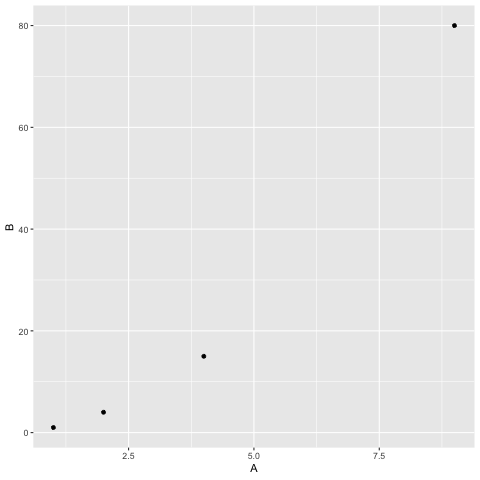

In [7]:
%%R
(ggplot(dfR)
 + geom_point(
     aes(x = A,
         y = B)))

## The Anatomy of a `altair` Visualization

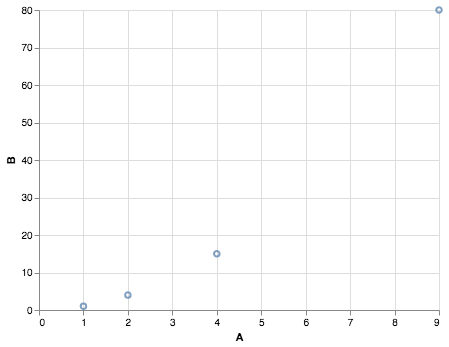

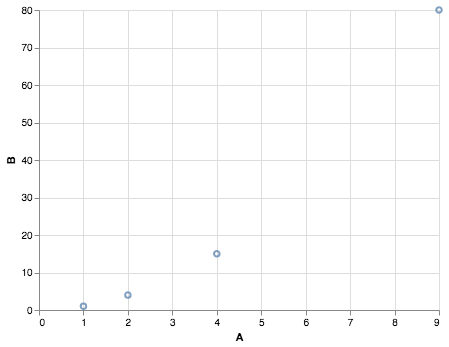

In [8]:
(alt.Chart(dfpy) 
 .mark_point()
 .encode(x = 'A',
         y = 'B'))

## Comparing `ggplot2` and `altair`

<img src="./img/ggplot_altair.png" width=600>

#### Example 2

In [9]:
%R dfR2 <- data.frame(x = 1:5 , y = 1:25, z = 1:25)
dfpy2 = pd.DataFrame({'x':5*list(range(1,6)), 
                      'y':list(range(1,26)), 
                      'z':list(range(1,26))})

#### Mapping continuous C with size:

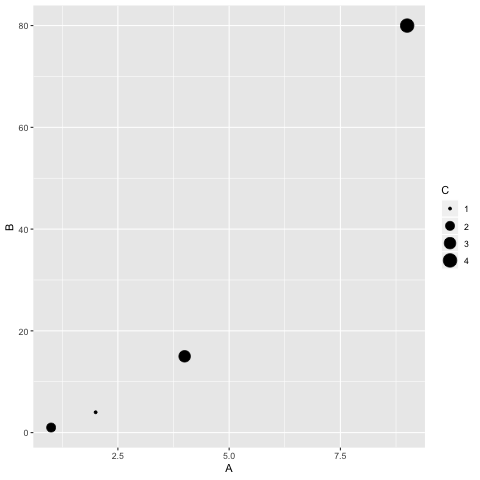

In [10]:
%%R
(ggplot(dfR) 
 +geom_point(aes(x = A,
                 y = B , 
                 size = C)))

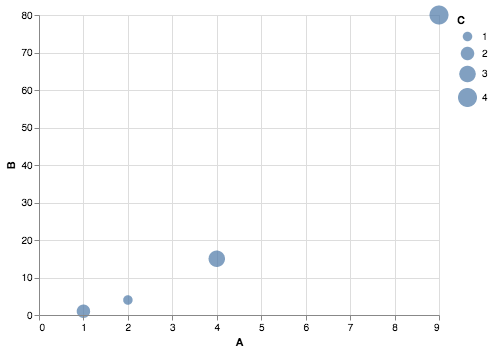

In [11]:
(alt.Chart(dfpy) 
 .mark_point(filled=True)
 .encode(x = 'A',
         y = 'B' , 
         size = 'C'))

#### Mapping continuous C with size and color:

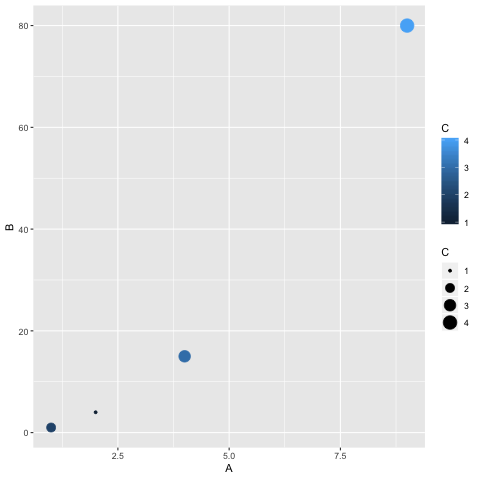

In [12]:
%%R
(ggplot(dfR) 
 +geom_point(aes(x = A,
                 y = B , 
                 size = C,
                 color = C)))

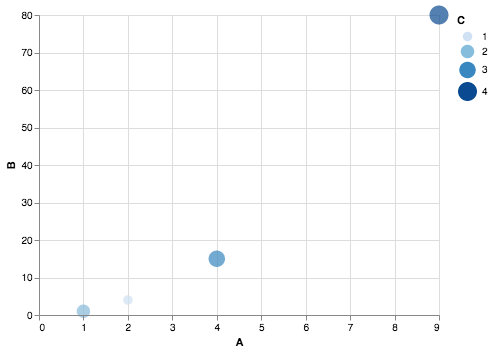

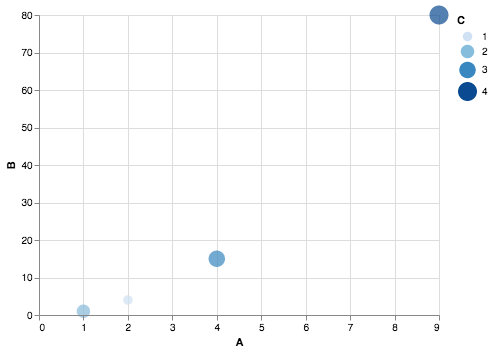

In [13]:
(alt.Chart(dfpy) 
 .mark_point(filled=True)
 .encode(x = 'A',
         y = 'B' , 
         size = 'C',
         color = 'C'))

#### Mapping continuous C with shape:

In [31]:
%%R
(ggplot(dfR) 
 +geom_point(aes(x = A,
                 y = B , 
                 shape = C)))

R[write to console]: Error: A continuous variable can not be mapped to shape



RRuntimeError: Error: A continuous variable can not be mapped to shape


In [14]:
(alt.Chart(dfpy) 
 .mark_point(filled=True)
 .encode(x = 'A',
         y = 'B' , 
         shape = 'C'))

SchemaValidationError: Invalid specification

        altair.vegalite.v3.schema.channels.Shape->type, validating 'enum'

        'quantitative' is not one of ['nominal', 'ordinal', 'geojson']
        

Chart({
  data:    A   B  C     D
  0  2   4  1   far
  1  1   1  2   far
  2  4  15  3  near
  3  9  80  4  near,
  encoding: FacetedEncoding({
    shape: Shape({
      shorthand: 'C'
    }),
    x: X({
      shorthand: 'A'
    }),
    y: Y({
      shorthand: 'B'
    })
  }),
  mark: MarkDef({
    filled: True,
    type: 'point'
  })
})

## <font color="red"> Challenge </font>

Re-create the following plots:

#### Plot 1

<img src="./img/challenge1.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here

#### Plot 2

<img src="./img/challenge2.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here

#### Plot 3

<img src="./img/challenge3.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here

#### Plot 4

<img src="./img/challenge4.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here

### Notes

* *Continuous* mapped to **size** or **color**
* *Discrete* mapped to **shape** or **color**

## Layers

* Used to overlay two plots.
* Both frameworks use `+` to layer
    * `ggplot2` can layer two geoms in one chart
    * `altair` requires one chart per mark, then layer complete charts
* Order matters: RHS drawn on top.

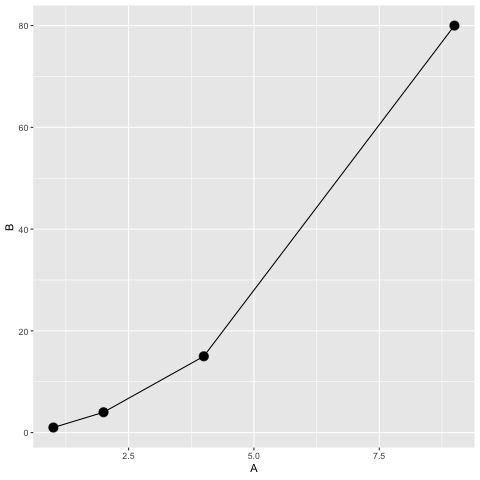

In [19]:
%%R
(ggplot(dfR) 
 + geom_point(aes(x = A,y = B), size = 4) 
 + geom_line(aes(x = A,y = B)))

## Replicated code and the DRY principle

<img src="./img/dry.png" width=600>

## The solution

* `ggplot2` allows assigning a global `aes` making to the whole chart.
* Applies to both `geom_point` and `geom_line`

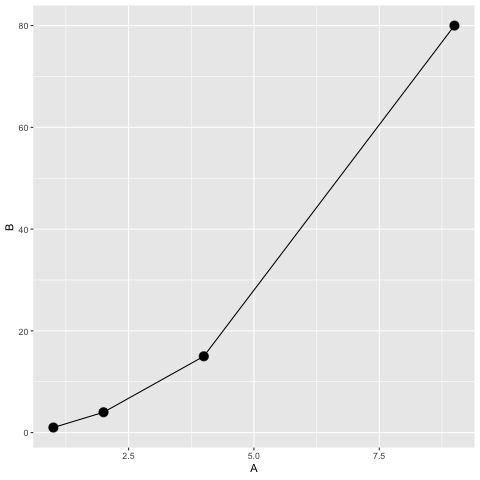

In [21]:
%%R
(ggplot(dfR, aes(x = A,y = B)) 
 + geom_point(size = 4) 
 + geom_line())

## Layers in `altair`

To layer points and lines in `altair` we

1. Create two separate plots, one for each mark
2. Layer the plots using `+`

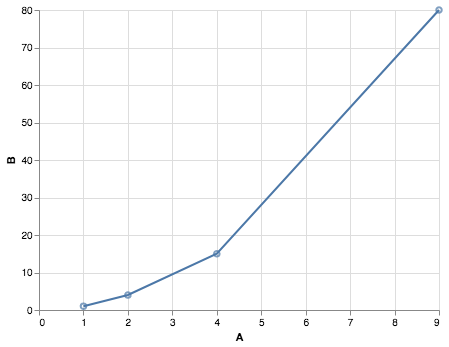

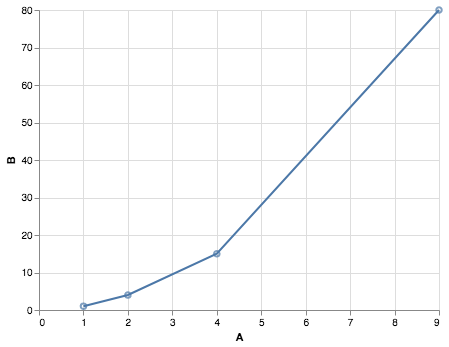

In [23]:
(alt.Chart(dfpy).mark_point().encode(x='A',y='B') 
+ alt.Chart(dfpy).mark_line().encode(x='A',y='B'))

## Using assignment to clean up the code

Note that each plot can be assigned to a variable to make the code more readable.

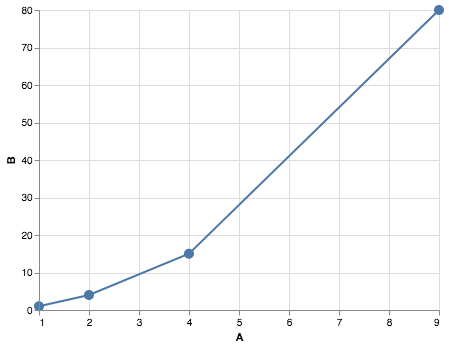

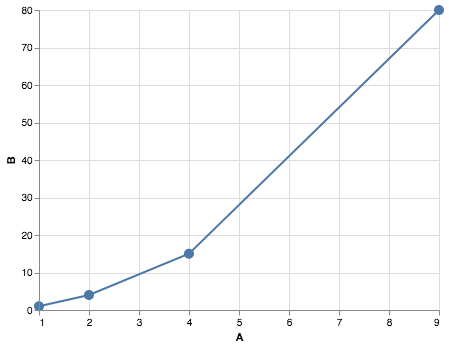

In [24]:
points = (alt.Chart(dfpy)
          .mark_point(size=100, 
                      filled=True, 
                      opacity=1)
          .encode(x='A',y='B'))
line = (alt.Chart(dfpy)
        .mark_line()
        .encode(x='A',y='B'))
line + points

## Using keyword assignment to abstract out the point properties

Another way to clean up the code is saving the point properties to a Python `dict` and using the `**` keyword unpacking to pass them to `mark_point`.

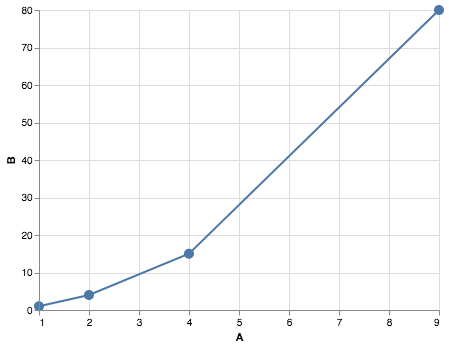

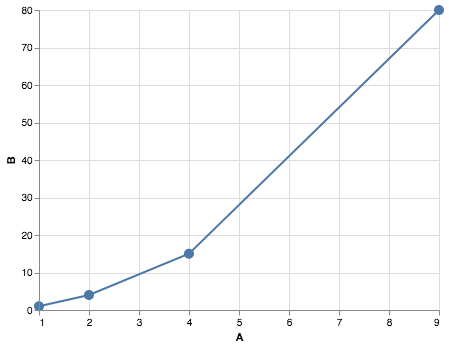

In [25]:
point_props = {'size':100,'filled':True,'opacity':1}

base = alt.Chart(dfpy).encode(x='A',y='B')

points = base.mark_point(**point_props)
line = base.mark_line()

line + points

## <font color="red"> Challenge 2 </font>

Re-create the following plots:

#### Plot 1

<img src="./img/challenge2_1.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here

#### Plot 2

<img src="./img/challenge2_2.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here

#### Plot 3

<img src="./img/challenge2_3.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here

#### Plot 4

<img src="./img/challenge2_4.png" width=300/>

In [15]:
%%R
# Your code here

In [15]:
# Your code here